In [1]:
import cvxpy as cp
# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()
# Create two constraints.
constraints = [x + y == 1,
x - y >= 1]
# Form objective.
obj = cp.Minimize((x - y)**2)
# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve() # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status: optimal
optimal value 1.0
optimal var 1.0 1.570086213240983e-22


In [22]:
import cvxpy as cp
import numpy as np
# Create two scalar optimization variables.
x = cp.Variable()
# Create two constraints.
constraints = [x >=0, x <= 1]
# Form objective.
a = np.random.randn(10) *10
b = np.random.randn(10) /10
c = np.random.randn(10) /10
for index in range(len(a)):
    if a[index] < 0:
        a[index] = -a[index]
    if b[index] < 0:
        b[index] = -b[index]
    if c[index] < 0:
        c[index] = -c[index]
print(-cp.sum(a * cp.log(b * x + c)))
obj = cp.Minimize(-cp.sum(a * cp.log(b * x + c)))
# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve() # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

-Sum([ 4.8069281   6.54478554  1.00192051 14.43584027 12.72829623  5.72984073
 11.91873463  8.18405943  7.06474957  9.22763902] @ log([0.08037766 0.0754897  0.02620376 0.19454287 0.03646743 0.00238092
 0.0165103  0.04957525 0.04558878 0.05363139] @ Promote(var742, (10,)) + [0.1156762  0.02581912 0.16191049 0.01530128 0.04570296 0.03165182
 0.00728113 0.04122465 0.03540156 0.0364486 ]), None, False)
status: optimal
optimal value 202.3676855373706
optimal var 0.999999993004107


/usr/local/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 19 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 20 times so far.

  warnings.warn(msg, UserWarning)


In [2]:
# Replace the objective.
prob2 = cp.Problem(cp.Maximize(x + y), prob.constraints)
print("optimal value", prob2.solve())
# Replace the constraint (x + y == 1).
constraints = [x + y <= 3] + prob2.constraints[1:]
prob3 = cp.Problem(prob2.objective, constraints)
print("optimal value", prob2.solve())

optimal value 0.9999999999945575
optimal value 0.9999999999945575


In [3]:
x = cp.Variable()
# An infeasible problem.
prob = cp.Problem(cp.Minimize(x), [x >= 1, x <= 0])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
# An unbounded problem.
prob = cp.Problem(cp.Minimize(x))
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

status: infeasible
optimal value inf
status: unbounded
optimal value -inf


## bounded least-squares problem

In [12]:
# Solves a bounded least-squares problem.
import cvxpy as cp
import numpy
# Problem data.
m = 10
n = 5
numpy.random.seed(1)
A = numpy.random.randn(m, n)
b = numpy.random.randn(m)
# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)
print("Optimal value", prob.solve())
print("Optimal var")
print(x.value.round(3)) # A numpy ndarray.

Optimal value 4.141338603672535
Optimal var
[-0.     0.     0.135  0.125 -0.   ]


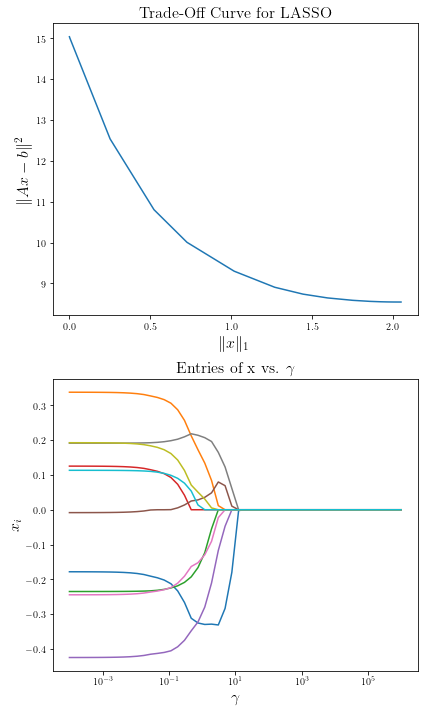

In [24]:
import cvxpy as cp
import numpy
import matplotlib.pyplot as plt
# Problem data.
n = 15
m = 10
numpy.random.seed(1)
A = numpy.random.randn(n, m)
b = numpy.random.randn(n)
# gamma must be nonnegative due to DCP rules.
gamma = cp.Parameter(nonneg=True)
# Construct the problem.
x = cp.Variable(m)
error = cp.sum_squares(A @ x - b)
obj = cp.Minimize(error + gamma*cp.norm(x, 1))
prob = cp.Problem(obj)
# Construct a trade-off curve of ||Ax-b||^2 vs. ||x||_1
sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = numpy.logspace(-4, 6)
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(error.value)
    l1_penalty.append(cp.norm(x, 1).value)
    x_values.append(x.value)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6,10))
# Plot trade-off curve.
plt.subplot(211)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel('$\|x\|_1$', fontsize=16)
plt.ylabel('$\|Ax-b\|^2$', fontsize=16)
plt.title('Trade-Off Curve for LASSO', fontsize=16)
# Plot entries of x vs. gamma.
plt.subplot(212)
for i in range(m):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel('$\gamma$', fontsize=16)
plt.ylabel('$x_{i}$', fontsize=16)
plt.xscale('log')
plt.title('Entries of x vs. $\gamma$', fontsize=16)
plt.tight_layout()
plt.show()

## 凸性测试

In [27]:
x = cp.Variable()
a = cp.Parameter(nonneg=True)
print("curvature of x:", x.curvature)
print("curvature of a:", a.curvature)
print("curvature of square(x):", cp.square(x).curvature)
print("curvature of sqrt(x):", cp.sqrt(x).curvature)

curvature of x: AFFINE
curvature of a: CONSTANT
curvature of square(x): CONVEX
curvature of sqrt(x): CONCAVE


In [1]:
import cvxpy as cp
x = cp.Variable()
y = cp.Variable()
# DCP problems.
prob1 = cp.Problem(cp.Minimize(cp.square(x - y)),
[x + y >= 0])
prob2 = cp.Problem(cp.Maximize(cp.sqrt(x - y)),
[2*x - 3 == y,
cp.square(x) <= 2])
print("prob1 is DCP:", prob1.is_dcp())
print("prob2 is DCP:", prob2.is_dcp())
# Non-DCP problems.
# A non-DCP objective.
obj = cp.Maximize(cp.square(x))
prob3 = cp.Problem(obj)
print("prob3 is DCP:", prob3.is_dcp())
print("Maximize(square(x)) is DCP:", obj.is_dcp())
# A non-DCP constraint.
prob4 = cp.Problem(cp.Minimize(cp.square(x)),
[cp.sqrt(x) <= 2])
print( "prob4 is DCP:", prob4.is_dcp())
print( "sqrt(x) <= 2 is DCP:", (cp.sqrt(x) <= 2).is_dcp())

prob1 is DCP: True
prob2 is DCP: True
prob3 is DCP: False
Maximize(square(x)) is DCP: False
prob4 is DCP: False
sqrt(x) <= 2 is DCP: False


In [9]:
import numpy as np
import cvxpy as cp
x = cp.Variable(10)
A = np.random.randn(100,10)
b = np.random.randn(100)
cp.geo_mean(A @ x + b).value

## 对偶变量

In [10]:
import cvxpy as cp
# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()
# Create two constraints.
constraints = [x + y == 1,
x - y >= 1]
# Form objective.
obj = cp.Minimize((x - y)**2)
# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()
# The optimal dual variable (Lagrange multiplier) for
# a constraint is stored in constraint.dual_value.
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
print("x - y value:", (x - y).value)

optimal (x + y == 1) dual variable 0.0
optimal (x - y >= 1) dual variable 2.0
x - y value: 1.0


In [17]:
# Creates a 100 by 100 positive semidefinite variable.
X = cp.Variable((100, 100), PSD=True)
# You can use X anywhere you would use
# a normal CVXPY variable.
obj = cp.Minimize(cp.norm(X) + cp.sum(X))

Y = cp.Variable((10,10), PSD=True)
cons = [X >> 0, X == X.T]
obj2 = cp.Minimize(cp.norm(X,p=2) + cp.sum(X))
pro2 = cp.Problem(obj2, cons)
pro2.solve()
print(X.value.round(2).sum())


0.0


## 包含整数或者0-1变量的问题

In [18]:
x = cp.Variable(10, boolean=True)

In [19]:
x = cp.Variable(10, integer=True)

## 使用不同的solver

In [2]:
import cvxpy as cp
# Solving a problem with different solvers.
x = cp.Variable(2)
obj = cp.Minimize(x[0] + cp.norm(x, 1))
constraints = [x >= 2]
prob = cp.Problem(obj, constraints)
# Solve with OSQP.
prob.solve(solver=cp.OSQP)
print("optimal value with OSQP:", prob.value)
# Solve with ECOS.
prob.solve(solver=cp.ECOS)
print("optimal value with ECOS:", prob.value)

# Solve with ECOS_BB.
prob.solve(solver=cp.ECOS_BB)
print("optimal value with ECOS_BB:", prob.value)
# Solve with CVXOPT.
prob.solve(solver=cp.CVXOPT)
print("optimal value with CVXOPT:", prob.value)
# Solve with SCS.
prob.solve(solver=cp.SCS)
print("optimal value with SCS:", prob.value)
# Solve with GLPK.
prob.solve(solver=cp.GLPK)
print("optimal value with GLPK:", prob.value)
# Solve with GLPK_MI.
prob.solve(solver=cp.GLPK_MI)
print("optimal value with GLPK_MI:", prob.value)
# Solve with GUROBI.
# prob.solve(solver=cp.GUROBI)
# print("optimal value with GUROBI:", prob.value)
# Solve with MOSEK.
# prob.solve(solver=cp.MOSEK)
# print("optimal value with MOSEK:", prob.value)
# Solve with Elemental.
# prob.solve(solver=cp.ELEMENTAL)
# print("optimal value with Elemental:", prob.value)
# Solve with CBC.
prob.solve(solver=cp.CBC)
print("optimal value with CBC:", prob.value)
# Solve with CPLEX.
# prob.solve(solver=cp.CPLEX)
# print( "optimal value with CPLEX:", prob.value)

optimal value with CBC: 6.0


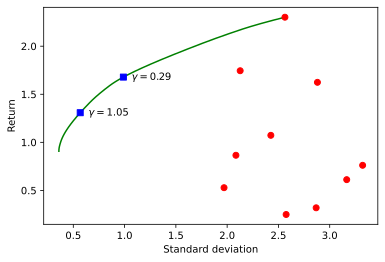

In [3]:
# Generate data for long only portfolio optimization.
import numpy as np
np.random.seed(1)
n = 10
mu = np.abs(np.random.randn(n, 1))
Sigma = np.random.randn(n, n)
Sigma = Sigma.T.dot(Sigma)
# Long only portfolio optimization.
import cvxpy as cp


w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T @ w 
risk = cp.quad_form(w, Sigma)
prob = cp.Problem(cp.Maximize(ret - gamma*risk), 
               [cp.sum(w) == 1, 
                w >= 0])
# Compute trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value
# Plot long only trade-off curve.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.08, ret_data[marker]-.03))
for i in range(n):
    plt.plot(cp.sqrt(Sigma[i,i]).value, mu[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

In [33]:
print (cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS']


## 可视化cvxpy的计算结果

In [34]:
prob.solve(solver=cp.ECOS, verbose=True)
print ("optimal value with ECOS:", prob.value)

                                     CVXPY                                     
                                    v1.1.14                                    
(CVXPY) May 08 02:19:39 PM: Your problem has 10 variables, 2 constraints, and 1 parameters.
(CVXPY) May 08 02:19:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 08 02:19:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 08 02:19:39 PM: Compiling problem (target solver=ECOS).
(CVXPY) May 08 02:19:39 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) May 08 02:19:39 PM: Applying reduction FlipObjective
(CVXPY) May 08 02:19:39 PM: Applying reduction D

## warm start 解决一系列超参数的搜索问题

In [36]:
import cvxpy as cp
import numpy
# Problem data.
m = 2000
n = 1000
numpy.random.seed(1)
A = numpy.random.randn(m, n)
b = cp.Parameter(m)
# Construct the problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(cp.sum_squares(A @ x - b)),
[x >= 0])
b.value = numpy.random.randn(m)
prob.solve()
print("First solve time:", prob.solver_stats.solve_time)
b.value = numpy.random.randn(m)
prob.solve(warm_start=True)
print("Second solve time:", prob.solver_stats.solve_time)


# 关于特定优化器的参数，比如对于SCS，告诉其用非直接方法计算线性方程
prob.solve(solver=cp.SCS, verbose=True, use_indirect=True)
print( "optimal value with SCS:", prob.value)

First solve time: 14.256904516
Second solve time: 9.01560664


In [48]:
import cvxpy as cp
import numpy as np
X = cp.Variable((10,10))
Y = cp.Parameter((10,10))
Y.value = np.random.randn(10,10)
obj = 0.4 * cp.mixed_norm(X, 2, 1)+cp.norm(X - Y,'fro')
cp.Problem(cp.Minimize(obj)).solve()
print(Y.value.round(2))
print(X.value.round(2))

[[-0.39  0.01 -0.29  0.49  2.28 -0.11  2.25 -0.61 -0.33  1.24]
 [ 0.16  0.71  0.37  1.67 -1.36 -0.98  0.41  2.78 -0.61  0.55]
 [ 1.87  0.99  2.3  -1.59 -1.11 -2.   -0.52  0.27 -0.84  0.3 ]
 [ 0.3  -0.71  0.5  -0.63 -0.82  1.09  1.91  0.93 -0.53  0.55]
 [ 0.97  0.53 -0.19 -2.65  0.72  0.02  0.1  -0.61 -2.15 -0.14]
 [ 1.14  0.72 -0.57  0.05 -0.37 -2.01  0.17  1.48  1.91 -0.22]
 [ 0.58 -1.84 -1.2   0.4   0.48 -1.53 -0.87 -0.8   0.74 -0.26]
 [ 0.04  1.1   0.53 -1.01  0.07 -1.08  0.13  1.18  0.87  0.7 ]
 [ 0.47  0.96  0.28  0.76  0.15  0.53  0.25  0.99  1.07 -0.53]
 [-1.03 -0.19  1.9   0.68 -2.32  0.73 -0.95  0.1  -1.53 -2.35]]
[[-0.    0.   -0.    0.    0.   -0.    0.   -0.   -0.    0.  ]
 [ 0.    0.    0.    0.   -0.   -0.    0.    0.   -0.    0.  ]
 [ 0.    0.    0.   -0.   -0.   -0.   -0.    0.   -0.    0.  ]
 [ 0.   -0.    0.   -0.   -0.    0.    0.    0.   -0.    0.  ]
 [ 0.    0.   -0.   -0.    0.    0.    0.   -0.   -0.   -0.  ]
 [ 0.    0.   -0.    0.   -0.   -0.    0.    0.    0. 